In [1]:
import pandas as pd
import os
import re
import numpy as np
 
 
def split_filename(filename):
    # Regex to match a string followed by digits and ending with ".jpg"
    match = re.match(r"([a-zA-Z]+)(\d+)\.jpg", filename)
    
    if match:
        name_part = match.group(1)
        number_part = match.group(2)
        return name_part, number_part
    else:
        return None, None
    
group_value_mapping = {
 
    # "rest": 2,
    # "one": 1,
 
    # 'partially folded': 0,
    # 'folded': 1,
    # 'rest':2
 
    "horizontal": 0,
    "vertical": 1,
    "lower diagonal": 2,
    "upper diagonal": 3,
 
    # "eyes": 0,
    # "ears": 1,
    # "nose": 2,
    # "lips": 3,
    # "chin": 4,
    # "cheeks": 5,
    # "none":6,
    # "hair":7,
    # "forehead": 8

    # 'joined': 0,
    # 'notjoined': 1,
 
    # 'open': 0,
    # 'closed': 1,
    # 'thumb alone open': 2,
    # 'index finger open': 3,
    # 'partially joined': 4
 
    # 'chest': 0,
    # 'face': 1,
    # 'abdomen': 2,
    # 'belowabdomen':3,
 
    # "towards body": 0,
    # "upwards": 1,
    # "away from body": 2,
    # "downwards": 3,
    # "towards left": 4,
    # "towards right": 5  ,   
 
}
 
def get_X_and_Y_value(csv_file_path,path_to_npy_files):
 
    X_label,Y_label  = [],[]
 
    data = pd.read_csv(csv_file_path)
 
    print(data.columns)
    for index, row in data.iterrows():
        print(index)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
        image_name = row[data.columns[0]].replace(",","")
        orientation_key = row[data.columns[1]]
        print("image_name----",image_name)

        name_part, number_part = split_filename(image_name)
        print(name_part,number_part)
        # npy_file_path = os.path.join(path_to_npy_files, f'{name_part}/{name_part}_{number_part}.npy')
        npy_file_path = os.path.join(path_to_npy_files, f'{name_part}/{number_part}.npy')

        X_label.append(np.load(npy_file_path))
        Y_label.append(group_value_mapping[orientation_key])
         
        print(image_name)
        print(name_part+'_'+number_part+'.npy')
        print(orientation_key)
    
    return X_label,Y_label

 
if __name__ == '__main__':
 
    # csv_path = '/4TBHD/ISL/data_preparation/individual_feature_new/right_palm_position.csv'
    csv_path = '/4TBHD/ISL/CodeBase/Normalized_Concat_Data/new_hands_involved_concat.csv'
    path_to_npy_files = '/4TBHD/ISL/data_preparation/test_blank_keypoints/Keypointsw/'
    # path_to_npy_files = '/4TBHD/ISL/data_preparation/feature_keys/Keypoints/right_arm_folded/'
 
    # x,y = get_X_and_Y_value(csv_path,path_to_npy_files)

In [13]:
import pandas as pd
import os
import re
import numpy as np
file_name = 'right_elbow_orientation'
data = pd.read_csv(f'/4TBHD/ISL/CodeBase/Dataset/normalized_v2_post4.7k/{file_name}.csv')
x,y=[],[]
print(data.columns)
for index, row in data.iterrows():
    print(index)
    image_name = row[data.columns[0]].replace(",","")
    orientation_key = row[data.columns[1]]

# for i in range(len(path)):
#     image_name = path[i]
#     orientation_key = corrections[i]
    print(orientation_key)
    # name_part, number_part = split_filename(image_name)

    # npy_file_path = os.path.join(path_to_npy_files, f'{name_part}/{name_part}_{number_part}.npy')
    npy_file_path = os.path.join(image_name.replace('onlyface','keypoints').replace('.jpg','.npy'))

    x.append(np.load(npy_file_path))
    y.append(group_value_mapping[orientation_key])


Index(['input_path', 'right_elbow_orientation'], dtype='object')
0
upper diagonal
1
upper diagonal
2
upper diagonal
3
upper diagonal
4
upper diagonal
5
upper diagonal
6
upper diagonal
7
upper diagonal
8
upper diagonal
9
upper diagonal
10
upper diagonal
11
upper diagonal
12
upper diagonal
13
upper diagonal
14
upper diagonal
15
upper diagonal
16
upper diagonal
17
upper diagonal
18
upper diagonal
19
upper diagonal
20
upper diagonal
21
upper diagonal
22
upper diagonal
23
upper diagonal
24
upper diagonal
25
upper diagonal
26
upper diagonal
27
upper diagonal
28
upper diagonal
29
upper diagonal
30
upper diagonal
31
upper diagonal
32
upper diagonal
33
upper diagonal
34
upper diagonal
35
upper diagonal
36
upper diagonal
37
upper diagonal
38
upper diagonal
39
upper diagonal
40
upper diagonal
41
upper diagonal
42
upper diagonal
43
upper diagonal
44
upper diagonal
45
upper diagonal
46
upper diagonal
47
upper diagonal
48
upper diagonal
49
upper diagonal
50
upper diagonal
51
upper diagonal
52
upper 

In [14]:
uni = (list(set(y)))
for i in uni:
    print(i)

0
1
2
3


In [15]:
len(x)

12000

In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
import torch.nn as nn
# Convert to numpy arrays
# data_x = np.array(data_x)  # shape (1000, 64, 2)
# data_y = np.array(data_y)  # shape (1000, 19)

data_x = np.array(x)  # shape (1000, 64, 2)
data_y = np.array(y)  # shape

# Flatten x to (num_samples, 128)
data_x_flat = data_x.reshape(len(data_x), -1)

# # Example data (replace with actual data)
num_samples = len(data_x)
batch_size =100

# Convert to numpy arrays
# data_x = np.array(data_x)  # shape (1000, 64, 2)
# data_y = np.array(data_y)  # shape (1000, 6)

# Convert to PyTorch tensors
x_tensor = torch.tensor(data_x_flat, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split data into train and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# DataLoader
train_data = torch.utils.data.TensorDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)

val_data = torch.utils.data.TensorDataset(x_val, y_val)
val_loader = torch.utils.data.DataLoader(val_data, batch_size, shuffle=False)

test_data = torch.utils.data.TensorDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size, shuffle=False)


In [122]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_data) / batch_size)
# num_epochs = int(num_epochs)

# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                            batch_size=batch_size, 
#                                            shuffle=True)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)

In [45]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim,dropout_prob):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Linear function 4: 100 --> 100
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 4
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(p=dropout_prob)

        # Linear function 5: 100 --> 100
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 5
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(p=dropout_prob)

        # Linear function 6: 100 --> 100
        self.fc6 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 6
        self.relu6 = nn.ReLU()
        self.dropout6 = nn.Dropout(p=dropout_prob)

        # Linear function 7: 100 --> 100
        self.fc7 = nn.Linear(hidden_dim, hidden_dim)
        # # Non-linearity 7
        self.relu7 = nn.ReLU()
        self.dropout7 = nn.Dropout(p=dropout_prob)

        # Linear function 8: 100 --> 100
        self.fc8 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 8
        self.relu8 = nn.ReLU()
        self.dropout8 = nn.Dropout(p=dropout_prob)

        # # Linear function 9 (readout): 100 --> 10
        self.fc9 = nn.Linear(hidden_dim, output_dim)  
        # self.fc4 = nn.Linear(hidden_dim, output_dim)  

        # Apply fixed weight initialization
        self.apply(self.initialize_weights)
        
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        out = self.dropout1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        out = self.dropout2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        out = self.dropout3(out)

        # Linear function 2
        out = self.fc4(out)
        # Non-linearity 2
        out = self.relu4(out)
        out = self.dropout4(out)

        # Linear function 2
        out = self.fc5(out)
        # Non-linearity 2
        out = self.relu5(out)
        out = self.dropout5(out)

        # Linear function 2
        out = self.fc6(out)
        # Non-linearity 2
        out = self.relu6(out)
        out = self.dropout6(out)

        # Linear function 2
        out = self.fc7(out)
        # Non-linearity 2
        out = self.relu7(out)
        out = self.dropout7(out)

        # Linear function 2
        out = self.fc8(out)
        # Non-linearity 2
        out = self.relu8(out)
        out = self.dropout8(out)

        # Linear function 4 (readout)
        out = self.fc9(out)
        # out = self.fc4(out)
        return out

    def initialize_weights(self, layer):
        if isinstance(layer, nn.Linear):
            # Initialize weights with Xavier uniform
            torch.nn.init.xavier_uniform_(layer.weight)
            # Initialize biases with zeros
            if layer.bias is not None:
                torch.nn.init.zeros_(layer.bias)

In [63]:
import torch
import torch.nn as nn

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_prob):
        """
        input_dim: Size of the input layer.
        hidden_dims: A list of integers where each integer specifies the number of neurons in that hidden layer.
        output_dim: Size of the output layer.
        dropout_prob: Dropout probability.
        """
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Create lists to hold the layers and dropouts dynamically
        self.fc_layers = nn.ModuleList()
        self.relu_layers = nn.ModuleList()
        self.dropout_layers = nn.ModuleList()

        # First hidden layer (input_dim -> first hidden layer size)
        self.fc_layers.append(nn.Linear(input_dim, hidden_dims[0]))
        self.relu_layers.append(nn.ReLU())
        self.dropout_layers.append(nn.Dropout(p=dropout_prob))

        # Create hidden layers dynamically (hidden_dims[i-1] -> hidden_dims[i])
        for i in range(1, len(hidden_dims)):
            self.fc_layers.append(nn.Linear(hidden_dims[i-1], hidden_dims[i]))
            self.relu_layers.append(nn.ReLU())
            self.dropout_layers.append(nn.Dropout(p=dropout_prob))

        # Output layer (last hidden layer -> output_dim)
        self.output_layer = nn.Linear(hidden_dims[-1], output_dim)

        # Apply fixed weight initialization
        self.apply(self.initialize_weights)

    def forward(self, x):
        # Pass through each hidden layer with activation and dropout
        for fc, relu, dropout in zip(self.fc_layers, self.relu_layers, self.dropout_layers):
            x = fc(x)
            x = relu(x)
            x = dropout(x)

        # Output layer (no activation here, since it could be for classification or regression)
        x = self.output_layer(x)
        return x

    def initialize_weights(self, layer):
        if isinstance(layer, nn.Linear):
            # Initialize weights with Xavier uniform
            torch.nn.init.xavier_uniform_(layer.weight)
            # Initialize biases with zeros
            if layer.bias is not None:
                torch.nn.init.zeros_(layer.bias)

# Example usage:
# input_dim = 104  # Input feature size
# hidden_dims = [128, 64, 32]  # Different neurons for each hidden layer
# output_dim = 10  # Output size (number of classes or regression targets)
# dropout_prob = 0.5  # Dropout probability

# model = FeedforwardNeuralNetModel(input_dim, hidden_dims, output_dim, dropout_prob)


In [94]:
input_dim = 52*2
hidden_dims = [128,256,128]
output_dim = 4
num_epochs = 500
dropout_prob = 0.5
if torch.cuda.is_available():  
    device = "cuda" 
else:  
    device = "cpu"  

print("device",device)
model = FeedforwardNeuralNetModel(input_dim, hidden_dims, output_dim, dropout_prob)
model.to(device)
criterion = nn.CrossEntropyLoss()

device cuda


In [95]:
# learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-5)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [96]:

iter = 0
best_val_loss = float('inf')  # Initialize best validation loss to infinity
patience = 10  # Number of epochs to wait before stopping if no improvement
trigger_times = 0  # Counts how many times there was no improvement
loss_list=[]
val_loss_list = []

for epoch in range(num_epochs):
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(train_loader):
        # print("images",images)
        # print("labels",labels)

        # Load images with gradient accumulation capabilities
        # images = images.view(-1, 28*28).requires_grad_()

        # # Clear gradients w.r.t. parameters
        # optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Accumulate the loss
        running_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        correct += (predicted == labels).sum().item()

        iter += 1
    # Calculate training loss and accuracy
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    loss_list.append(avg_loss)
    
    # Print Loss and Accuracy for each epoch
    print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate validation loss
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()

    avg_val_loss = val_running_loss / len(val_loader)
    val_loss_list.append(avg_val_loss)

    # Print validation loss
    print(f'Validation Loss: {avg_val_loss:.4f}')

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        trigger_times = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'Best model saved at epoch {epoch+1}')
    else:
        trigger_times += 1
        print(f'No improvement for {trigger_times} epoch(s)')

    if trigger_times >= patience:
        print(f'Early stopping triggered after {trigger_times} epochs.')
        break
    
        # if iter % 500 == 0:
        # Calculate Accuracy         
        # correct = 0
        # total = 0
        # val_loss = 0
        # # Iterate through test dataset
        # for images, labels in val_loader:
        #     # Forward pass only to get logits/output
        #     outputs = model(images)

        #     # Get predictions from the maximum value
        #     _, predicted = torch.max(outputs.data, 1)

        #     v_loss = criterion(outputs, labels)
        #     val_loss += v_loss.item()

        #     # Total number of labels
        #     total += labels.size(0)

        #     # Total correct predictions
        #     correct += (predicted == labels).sum()

        # val_loss /= len(val_loader)
        # accuracy = 100 * correct / total

        # Print Loss
        # print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
        
    #     if val_loss < best_val_loss:
    #         best_val_loss = val_loss  # Update best validation loss
    #         trigger_times = 0  # Reset counter if loss improves
    #     else:
    #         trigger_times += 1
    #         print(f'No improvement in validation loss for {trigger_times} epochs')

    #         # Stop training if the validation loss hasn't improved for `patience` epochs
    #         if trigger_times >= patience:
    #             print(f'Early stopping at epoch {epoch + 1}')
    #             break  # Break out of the loop

    # if trigger_times >= patience:
    #     break  #

Epoch: 1/500, Loss: 1.4525, Accuracy: 26.85%
Validation Loss: 1.3294
Best model saved at epoch 1
Epoch: 2/500, Loss: 1.2401, Accuracy: 62.79%
Validation Loss: 1.1333
Best model saved at epoch 2
Epoch: 3/500, Loss: 0.9930, Accuracy: 73.76%
Validation Loss: 0.8646
Best model saved at epoch 3
Epoch: 4/500, Loss: 0.7832, Accuracy: 75.67%
Validation Loss: 0.7189
Best model saved at epoch 4
Epoch: 5/500, Loss: 0.6838, Accuracy: 77.43%
Validation Loss: 0.6737
Best model saved at epoch 5
Epoch: 6/500, Loss: 0.6380, Accuracy: 78.21%
Validation Loss: 0.6259
Best model saved at epoch 6
Epoch: 7/500, Loss: 0.6110, Accuracy: 79.29%
Validation Loss: 0.6143
Best model saved at epoch 7
Epoch: 8/500, Loss: 0.5945, Accuracy: 79.84%
Validation Loss: 0.5969
Best model saved at epoch 8
Epoch: 9/500, Loss: 0.5815, Accuracy: 79.99%
Validation Loss: 0.5852
Best model saved at epoch 9
Epoch: 10/500, Loss: 0.5688, Accuracy: 80.68%
Validation Loss: 0.5781
Best model saved at epoch 10
Epoch: 11/500, Loss: 0.5636,

In [23]:
print(len(loss_list))
print(num_epochs)

188
500


In [50]:
# if iter % 500 == 0:
# Calculate Accuracy         
correct = 0
total = 0
val_loss = 0
# Iterate through test dataset
for images, labels in val_loader:
    # Forward pass only to get logits/output
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # Get predictions from the maximum value
    _, predicted = torch.max(outputs.data, 1)

    v_loss = criterion(outputs, labels)
    val_loss += v_loss.item()

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

val_loss /= len(val_loader)
accuracy = 100 * correct / total

# Print Loss
print('validation : Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

validation : Iteration: 23136. Loss: 0.3468385338783264. Accuracy: 87.08333587646484


In [51]:
correct = 0
total = 0
test_loss = 0
# Iterate through test dataset
for images, labels in test_loader:
    # Load images with gradient accumulation capabilities
    # images = images.view(-1, 28*28).requires_grad_()

    # Forward pass only to get logits/output
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # Get predictions from the maximum value
    _, predicted = torch.max(outputs.data, 1)

    test_loss = criterion(outputs, labels)
    test_loss += test_loss.item()

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

test_loss /= len(test_loader)
accuracy = 100 * correct / total

# Print Loss
print('Test: Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Test: Iteration: 23136. Loss: 0.3468385338783264. Accuracy: 85.66667175292969


In [129]:
# torch.save(model.state_dict(), f'/4TBHD/ISL/CodeBase/vector_models/multi_people_models_v3/{file_name}.h5')

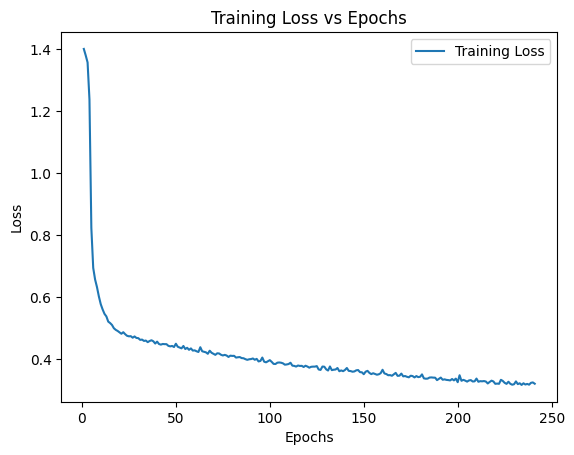

In [49]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming your trained model, criterion, and optimizer are already defined
# Set model to evaluation mode for testing
model.eval()

# Function to test and train until correct prediction on one data point
def train_until_correct(model, val_loader, max_epochs=1000):
    # correct_prediction = False
    epoch = 0

    # Loop through the validation loader to get a batch
    for val_data, val_labels in val_loader:
        # Assuming we are dealing with a batch of data here
        for i in range(len(val_data)):
            correct_prediction = False
            single_data = val_data[i].unsqueeze(0)  # Get the first data point in the batch
            single_label = val_labels[i].unsqueeze(0)  # Get the first label in the batch
            print("single_label",single_label)

            while not correct_prediction and epoch < max_epochs:
                # Test the model on the single data point
                with torch.no_grad():
                    output = model(single_data)
                    _, predicted = torch.max(output.data, 1)
                    print(f'Epoch {epoch}: Predicted: {predicted.item()}, Actual: {single_label.item()}')

                if predicted.item() == single_label.item():
                    print(f"Model predicted correctly at epoch {epoch}.")
                    correct_prediction = True
                    print("epoch",epoch)
                else:
                    # Retrain the model on this single data point
                    print(f"Retraining: Model predicted incorrectly at epoch {epoch}.")
                    model.train()

                    # Zero the parameter gradients
                    optimizer.zero_grad()

                    # Forward pass
                    output = model(single_data)

                    # Compute loss
                    loss = criterion(output, single_label)

                    # Backward pass and optimize
                    loss.backward()
                    optimizer.step()

                    epoch += 1

            # if correct_prediction:
            #     break  # Exit the loop if the model predicted correctly

    if not correct_prediction:
        print(f"Model did not predict correctly after {max_epochs} epochs.")
    else:
        print(f"Training successful, model correctly predicted after {epoch} epochs.")

    return epoch

epoch = 51
while epoch > 0:
    # Call the function to test and retrain on the first data point
    epoch = train_until_correct(model, val_loader)
    print(epoch)


In [1]:

import pandas as pd
import os

# Path to the Excel file
excel_file_path = "/4TBHD/ISL/CodeBase/model_prediction/right_elbow_orientation.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Define the CSV file path (same location as the Excel file)
csv_file_path = os.path.splitext(excel_file_path)[0] + ".csv"

# Save the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

print(f"File saved as CSV at: {csv_file_path}")


File saved as CSV at: /4TBHD/ISL/CodeBase/model_prediction/right_elbow_orientation.csv
